# Рекомендация тарифов
***

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Оглавление<a class="anchor" id="TOC"></a>
***

* **[I. Откройте и изучите файл](#1)**
    - [1) Импортируем библиотеки](#1_1)
    - [2) Прочитаем данные](#1_2)
    - [3) Выведем на экран пять первых, последних и случайных строк](#1_3)
    - [4) Выведем общую информацию о датасете, проверим индексы](#1_4)
    - [5) Исследуем целевой показатель](#1_5)
    - [Вывод](#1_conclusion)
* **[II.Разбейте данные на выборки](#2)**
    - [1) Подготовим датасет](#2_1)
    - [2) Применим масштабирование к данным](#2_2)
    - [Вывод](#2_conclusion)
* **[III. Исследуйте модели](#3)**
    - [1) KNeighborsClassifier](#3_1)
    - [2) DecisionTreeClassifier](#3_2)
    - [3) RandomForestClassifier](#3_3)
    - [4) LogisticRegression](#3_4)
    - [5) Support Vector Classification](#3_5)    
    - [Вывод](#3_conclusion)
* **[IV. Проверьте модель на тестовой выборке](#4)**  
    - [1) KNeighborsClassifier](#4_1)
    - [2) DecisionTreeClassifier](#4_2)
    - [3) RandomForestClassifier](#4_3) 
    - [4) LogisticRegression](#4_4)
    - [5) Support Vector Classification](#4_5)    
    - [Вывод](#4_conclusion)
* **[V. Проверьте модели на адекватность](#5)** 
    - [1) Сравним модель со случайной](#5_1)
    - [2) Сравним модель с константой](#5_2)
    - [Вывод](#5_conclusion)
* **[GridSearchCV](#grid)**
    - [1) KNeighborsClassifier](#grid_1)
    - [2) DecisionTreeClassifier](#grid_2)
    - [3) RandomForestClassifier](#grid_3) 
    - [4) Support Vector Classification](#grid_4)    
    - [Сравнение скоринга](#score_comparsion)

## I. Откройте и изучите файл<a class="anchor" id="1"></a>
***

### 1) Импортируем библиотеки<a class="anchor" id="1_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Объявим класс Display, который позволит выводить сразу несколько объектов в одной ячейке

In [2]:
class Display(object):
    """Выводит HTML представление нескольких объектов"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

[В оглавление](#TOC)

### 2) Прочитаем данные<a class="anchor" id="1_2"></a>

In [3]:
df = pd.read_csv('users_behavior.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)

[В оглавление](#TOC)

### 3) Выведем на экран пять первых, последних и случайных строк<a class="anchor" id="1_3"></a>

In [4]:
head = df.head(5)
tail = df.tail(5)
sample = df.sample(5)
Display('head', 'tail', 'sample')

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
,calls,minutes,messages,mb_used,is_ultra
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


&#9889; **Вывод:** 
1. В датасете представлены сводные данные для 500 пользователей - 3214 наблюдений, которые в полном датасете сгруппированы по месяцам. 
2. Для целей поставленной задачи: исходим из того, что представлена выборка 3214 пользователей - в противном случае неясно, что именно должна предсказывать модель.

[В оглавление](#TOC)

### 4) Выведем общую информацию о датасете, проверим индексы<a class="anchor" id="1_4"></a>

In [5]:
describe = df.describe()
corr = df.corr()
Display('describe', 'corr')

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000
,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [7]:
df.index

RangeIndex(start=0, stop=3214, step=1)

&#9889; **Вывод:** 
1. Поскольку предобработка данных выполнена заранее в датасете нет странных и пропущенных значений, нет проблем с типами данных (разве что избыточное int64 для бинарного is_ultra).
2. Наблюдается сильная положительная корреляция между тарифом и звонками, интернет трафиком и сообщениями.

[В оглавление](#TOC)

### 5) Исследуем целевой показатель<a class="anchor" id="1_5"></a>

In [8]:
df.is_ultra.value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

In [9]:
985/(2229+985)

0.30647168637212197

Две тысячи двести двадцать девять пользователей тарифа "Смарт" и девятьсот восемьдесят пять пользователей тарифа "Ультра" (31 %). Визуализруем количество пользователей.

[Text(0, 0, '0'), Text(0, 0, '1')]

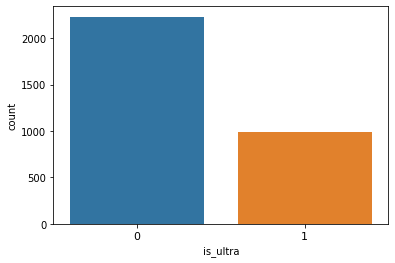

In [10]:
ax = sns.countplot(df['is_ultra'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)

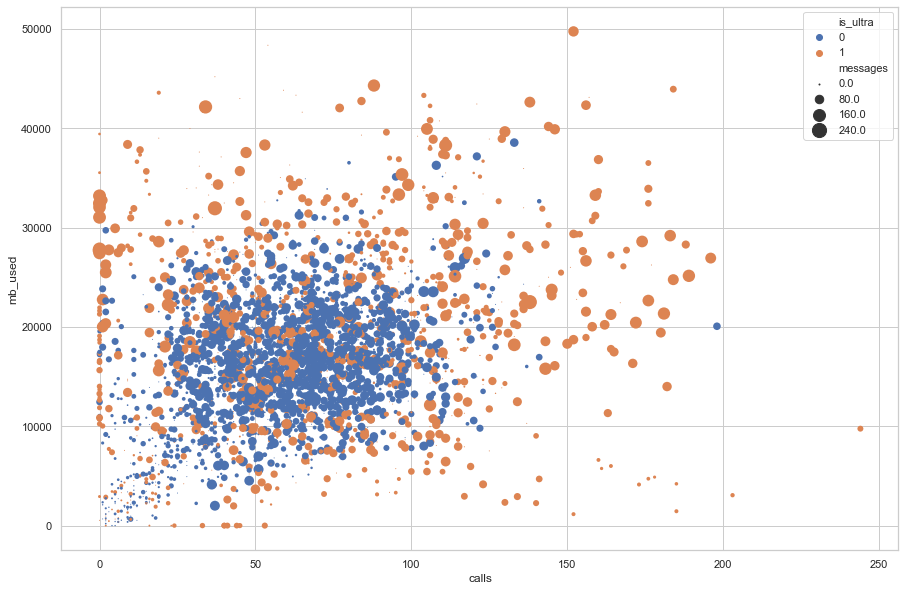

In [11]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(ax = ax, x="calls", y="mb_used",
                color="r",
                hue="is_ultra", size="messages",
                sizes=(1, 200), linewidth=0,
                data=df)

&#9889; **Вывод:**

1. В представленной выборке 2229 наблюдений для тарифа "Смарт", 985 наблюдений для тарифа "Ультра".
2. Сотношение тарифа "Ультра" к тарифу "Смарт" примерно 1 к 2. 
3. Тарифом "Ультра" пользуются 31 % пользователей в представленной выборке, соответственно, тарифом "Смарт" - 69 %.

[В оглавление](#TOC)

### Вывод:<a class="anchor" id="1_conclusion"></a>

1. В датасете 3214 наблюдений, нет странных и пропущенных значений, нет проблем с типами данных.
2. Наблюдается сильная положительная корреляция между тарифом и звонками, интернет трафиком и сообщениями.
3. В представленной выборке 2229 наблюдений для тарифа "Смарт" (69 %), 985 наблюдений для тарифа "Ультра" (31 %).

[В оглавление](#TOC)

## II. Разбейте данные на выборки<a class="anchor" id="2"></a>
***

### 1) Подготовим датасет<a class="anchor" id="2_1"></a>

**- выберем параметры**

In [12]:
feature = df.drop('is_ultra', axis=1)

In [13]:
feature.head(5)

,calls,minutes,messages,mb_used
0,40.0,311.90,83.0,19915.42
1,85.0,516.75,56.0,22696.96
2,77.0,467.66,86.0,21060.45
3,106.0,745.53,81.0,8437.39
4,66.0,418.74,1.0,14502.75


**- выберем тагет**

In [14]:
target = df.is_ultra

In [15]:
target.head(5)

0    0
1    0
2    0
3    1
4    0
Name: is_ultra, dtype: int64

**- выделим из датасета на обучающую часть**

In [16]:
feature_train, feature_test, target_train, target_test  = train_test_split(feature, target, test_size=0.4, 
                                                                           random_state = 42)

**- проверим форму полученных выборок**

In [17]:
feature_train.shape, target_train.shape

((1928, 4), (1928,))

In [18]:
feature_test.shape, target_test.shape

((1286, 4), (1286,))

**- разделим тестовый датасет на валидационный и тестовый**

In [19]:
feature_test, feature_valid, target_test, target_valid = train_test_split(feature_test, target_test, test_size=0.5, 
                                                                          random_state=42)

**- проверим форму полученных выборок**

In [20]:
feature_test.shape, target_test.shape

((643, 4), (643,))

In [21]:
feature_valid.shape, target_valid.shape

((643, 4), (643,))

[В оглавление](#TOC)

### 2) Применим масштабирование к данным:<a class="anchor" id="2_2"></a>

Признаки в датасете различаются по величине, единицам измерения и диапазону. Поскольку модели основаны на вычислении евклидового расстояния необходимо привести признаки к одной системе координат, для чего применяется масштабирование.

**- инициализируем scaler**

In [22]:
scaler = StandardScaler()

**- масштабируем тренировочные данные**

In [23]:
x_train = scaler.fit_transform(feature_train)

**- масштабируем валидационные данные**

In [24]:
x_valid = scaler.transform(feature_valid)

**- масштабируем тестовые данные**

In [25]:
x_test = scaler.transform(feature_test)

**- конвертируем ярлыки тарифа в одномерную матрицу** 

In [26]:
y_train = np.ravel(target_train)
y_valid = np.ravel(target_valid)
y_test = np.ravel(target_test)

### **Вывод:** <a class="anchor" id="2_conclusion"></a>

1. В датасете были выбраны параметры и таргет.
2. Датасеты с параметрами и таргетом были разделены на обучающую (0.6), валидационную (0.2) и тестовые (0.2) выборки.
3. Данные в каждой из выборок с параметрами были масштабированы.
4. Таргеты были конвертированы в одномерную матрицу.

[В оглавление](#TOC)

## III. Исследуйте модели<a class="anchor" id="3"></a>
***

In [27]:
from sklearn.model_selection import GridSearchCV

### 1) KNeighborsClassifier<a class="anchor" id="grid_1"></a>

In [28]:
knc = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1,20)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

grid_knc = GridSearchCV(estimator=knc, cv=5, param_grid = param_grid, n_jobs = -1)
grid_knc.fit(x_train, y_train)

best_estimator_knc = grid_knc.best_estimator_

In [29]:
grid_knc.score(x_valid, y_valid)

0.807153965785381

In [30]:
grid_knc.score(x_test, y_test)

0.7947122861586314

In [31]:
best_estimator_knc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

[В оглавление](#TOC)

### 2) DecisionTreeClassifier<a class="anchor" id="grid_2"></a>

In [32]:
dtc = DecisionTreeClassifier(random_state=42)

param_grid = {'max_depth': list(range(1,20)), 
              'min_samples_split': list(range(2,100)),
              'class_weight': ['balanced']
             }

grid_dtc = GridSearchCV(estimator=dtc, cv=5, param_grid = param_grid, n_jobs = -1)
grid_dtc.fit(x_train, y_train)

best_estimator_dtc = grid_dtc.best_estimator_

In [33]:
grid_dtc.score(x_valid, y_valid)

0.7993779160186625

In [34]:
grid_dtc.score(x_test, y_test)

0.7744945567651633

In [35]:
best_estimator_dtc

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

[В оглавление](#TOC)

### 3) RandomForestClassifier<a class="anchor" id="grid_3"></a>

In [36]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': list(range(2,50))}

grid_rfc = GridSearchCV(estimator=rfc, cv=5, param_grid = param_grid, n_jobs = -1)
grid_rfc.fit(x_train, y_train)
best_estimator_rfc = grid_rfc.best_estimator_

In [37]:
grid_rfc.score(x_valid, y_valid)

0.8087091757387247

In [38]:
grid_rfc.score(x_test, y_test)

0.7978227060653188

In [39]:
best_estimator_rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=38,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

[В оглавление](#TOC)

### 4) Support Vector Classification <a class="anchor" id="grid_4"></a>

In [40]:
svc = SVC(random_state=42)

param_grid = {'gamma': list(range(1,5)), 
              'C': list(range(1,10,2))
             }

grid_svc = GridSearchCV(estimator=svc, cv=5, param_grid = param_grid, n_jobs = -1)
grid_svc.fit(x_train, y_train)
best_estimator_svc = grid_svc.best_estimator_

In [41]:
grid_svc.score(x_valid, y_valid)

0.8118195956454122

In [42]:
grid_svc.score(x_test, y_test)

0.807153965785381

In [43]:
best_estimator_svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

[В оглавление](#TOC)

### 5) Сравнение скоринга <a class="anchor" id="score_comparsion"></a>

In [44]:
score_comparsion = pd.DataFrame([[grid_knc.score(x_test, y_test)],
                                 [grid_dtc.score(x_test, y_test)],
                                 [grid_rfc.score(x_test, y_test)],
                                 [grid_svc.score(x_test, y_test)]],
                                index = ['KNeighborsClassifier', 'DecisionTreeClassifier', 
                                         'RandomForestClassifier', 'Support Vector Classification'], 
                                columns = ['Score'])

In [45]:
score_comparsion.style.highlight_max(color='lightgreen', axis = 0)

,Score
KNeighborsClassifier,0.794712
DecisionTreeClassifier,0.774495
RandomForestClassifier,0.797823
Support Vector Classification,0.807154


[В оглавление](#TOC)